In [ ]:
from scipy.io import loadmat
import pandas as pd

In [ ]:
#mat = loadmat('../input/train_1/1_1_0.mat')
mat = loadmat('/content/drive/My Drive/tsne_EMG/Data/Database 2/male_day_1.mat')

In [ ]:
mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 18 12:44:17 2014',
 '__version__': '1.0',
 'cyl_ch1': array([[ 0.123201,  0.199706,  0.276211, ...,  0.123201,  0.174205,
          0.403719],
        [ 0.123201,  0.225208,  0.199706, ..., -0.233821,  0.021195,
          0.0977  ],
        [ 0.174205,  0.225208,  0.123201, ...,  0.0977  ,  0.199706,
         -0.029808],
        ...,
        [ 0.0977  ,  0.174205,  0.199706, ...,  0.0977  ,  0.148703,
          0.0977  ],
        [ 0.225208,  0.148703,  0.123201, ...,  0.148703,  0.148703,
          0.0977  ],
        [ 0.123201,  0.199706,  0.072198, ...,  0.174205,  0.021195,
          0.046696]]),
 'cyl_ch2': array([[ 0.278708,  0.380739,  0.380739, ...,  0.227693, -0.154923,
          0.125662],
        [ 0.431755,  0.125662,  0.508278, ...,  0.559294,  0.533786,
          0.992925],
        [ 0.584801, -0.0784  ,  0.329724, ..., -0.741602,  0.329724,
         -0.486524],
        ...,
 

In [ ]:
mdata = mat['cyl_ch1']

In [ ]:
cyl_ch1 = pd.DataFrame(mat['cyl_ch1'])
cyl_ch2 = pd.DataFrame(mat['cyl_ch2'])

hook_ch1 = pd.DataFrame(mat['hook_ch1'])
hook_ch2 = pd.DataFrame(mat['hook_ch2'])

lat_ch1 = pd.DataFrame(mat['lat_ch1'])
lat_ch2 = pd.DataFrame(mat['lat_ch2'])

palm_ch1 = pd.DataFrame(mat['palm_ch1'])
palm_ch2 = pd.DataFrame(mat['palm_ch2'])

spher_ch1 = pd.DataFrame(mat['spher_ch1'])
spher_ch2 = pd.DataFrame(mat['spher_ch2'])

tip_ch1 = pd.DataFrame(mat['tip_ch1'])
tip_ch2 = pd.DataFrame(mat['tip_ch2'])

In [ ]:
cyl_avg = (cyl_ch1+cyl_ch2)/2
hook_avg = (hook_ch1+hook_ch2)/2
lat_avg = (lat_ch1+lat_ch2)/2
palm_avg = (palm_ch1+palm_ch2)/2
spher_avg = (spher_ch1+spher_ch2)/2
tip_avg = (tip_ch1+tip_ch2)/2

In [ ]:
print(cyl_ch1.head())
print(cyl_ch2.head())
print(cyl_avg.head())

       0         1         2     ...      2497      2498      2499
0  0.123201  0.199706  0.276211  ...  0.123201  0.174205  0.403719
1  0.123201  0.225208  0.199706  ... -0.233821  0.021195  0.097700
2  0.174205  0.225208  0.123201  ...  0.097700  0.199706 -0.029808
3  0.148703  0.174205  0.021195  ...  0.148703  0.199706  0.225208
4  0.250710  0.072198  0.123201  ...  0.199706  0.225208 -0.080812

[5 rows x 2500 columns]
       0         1         2     ...      2497      2498      2499
0  0.278708  0.380739  0.380739  ...  0.227693 -0.154923  0.125662
1  0.431755  0.125662  0.508278  ...  0.559294  0.533786  0.992925
2  0.584801 -0.078400  0.329724  ... -0.741602  0.329724 -0.486524
3  0.457263  0.253201  0.253201  ...  0.431755 -0.052892  0.431755
4  1.732650 -2.578159  0.941910  ...  0.635817 -0.792617 -0.052892

[5 rows x 2500 columns]
       0         1         2     ...      2497      2498      2499
0  0.200955  0.290222  0.328475  ...  0.175447  0.009641  0.264690
1  0.277478 

In [ ]:
print (tip_avg.tail())

        0         1         2     ...      2497      2498      2499
95  0.213697  0.111675  0.137186  ...  0.685590  0.200955  0.481540
96  0.162696  0.149939  0.111678  ...  0.162696  0.047914  0.290235
97  0.200945  0.175438  0.175438  ... -0.105144 -1.316753  0.200958
98  0.149943  0.149943  0.060669  ... -0.551527  0.494297  0.124419
99  0.290226  0.098923  0.149937  ... -0.079625  0.277475  0.366740

[5 rows x 2500 columns]


In [ ]:
frames = [cyl_avg,hook_avg,lat_avg,palm_avg,spher_avg,tip_avg]

In [ ]:
gestures = pd.concat(frames)

In [ ]:
gestures ['label']= [i for i in range (6) for _ in range(100)]

In [ ]:
gestures['label'].value_counts()

5    100
4    100
3    100
2    100
1    100
0    100
Name: label, dtype: int64

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

**PCA**

In [ ]:
pca = PCA(n_components=3)
#pca_result = pca.fit_transform(df[feat_cols].values)
pca_result = pca.fit_transform(gestures.iloc[:,200:2200].values)
gestures['pca-one'] = pca_result[:,0]
gestures['pca-two'] = pca_result[:,1] 
gestures['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#Explained variation per principal component: [0.09746116 0.07155445 0.06149531]

Explained variation per principal component: [0.00815762 0.0078524  0.00766412]


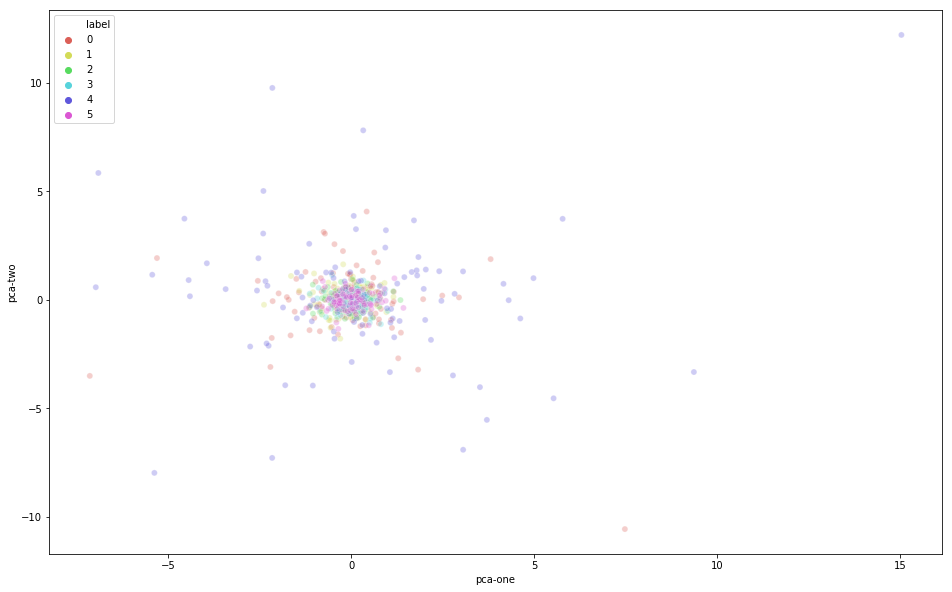

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 6),
    data=gestures,
    legend="full",
    alpha=0.3
)

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
type(gestures['label'])

pandas.core.series.Series

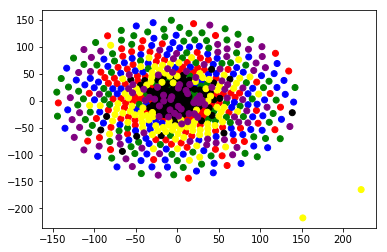

In [ ]:
x = gestures.iloc[:,200:2200]
y = gestures['label']

tsne = TSNE(n_components = 2, perplexity = 50, n_iter=1000)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.values.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','label'])
colors = {0:'red', 1:'blue', 2:'green', 3:'black', 4:'yellow', 5:'purple'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['label'].apply(lambda x: colors[x]))
plt.show()